### To predict the diabetes using PIMA diabetes data 

###### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###### Reading the data into a dataframe

In [3]:
df=pd.read_csv("diabetes.csv")

In [110]:
df.shape

(768, 9)

In [111]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [99]:
print(268/768*100)

34.89583333333333


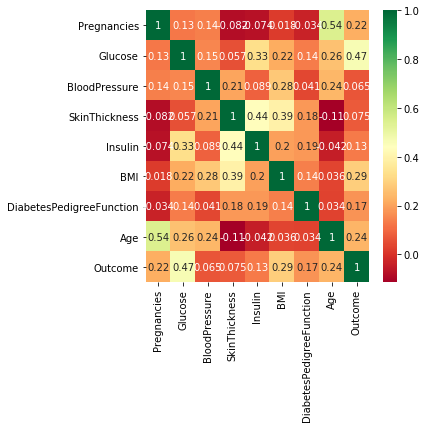

In [53]:
a=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(a,annot=True,cmap="RdYlGn")

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [43]:
df.isnull().values.any()

False

###### Imputing Missing 0 values in the dataset

In [82]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
X=df.iloc[:,range(0,8)]
y=df['Outcome']

In [135]:
X.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [87]:
print(" Total no of rows {}".format(len(X)))

 Total no of rows 768


In [77]:
print(" Total no of '0' rows {}".format(len(X.loc[X['Pregnancies']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['Glucose']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['BloodPressure']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['SkinThickness']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['Insulin']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['BMI']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['DiabetesPedigreeFunction']==0])))
print(" Total no of '0' rows {}".format(len(X.loc[X['Age']==0])))
#print(" Total no of '0' rows {}".format(len(X.loc[X['Outcome']==0])))

 Total no of '0' rows 111
 Total no of '0' rows 5
 Total no of '0' rows 35
 Total no of '0' rows 227
 Total no of '0' rows 374
 Total no of '0' rows 11
 Total no of '0' rows 0
 Total no of '0' rows 0


In [8]:
#from sklearn.preprocessing import Imputer
#fill_values=Imputer(missing_values=0, strategy='mean', axis=0)

ImportError: cannot import name 'Imputer'

In [137]:
#fill_values.fit_transform(X)

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

###### Splitting the datas into Train and Test data for the data modelling

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)


In [68]:
y_train.value_counts()

0    332
1    182
Name: Outcome, dtype: int64

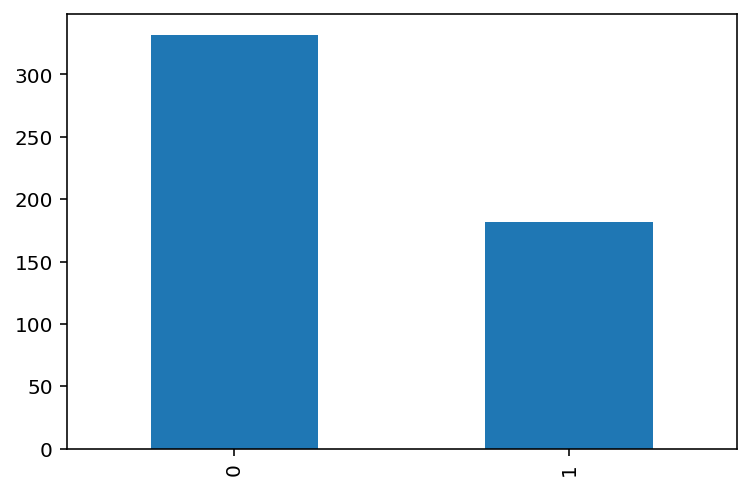

In [9]:
pd.Series(y_train).value_counts().plot.bar()

In [69]:
y_test.value_counts()

0    168
1     86
Name: Outcome, dtype: int64

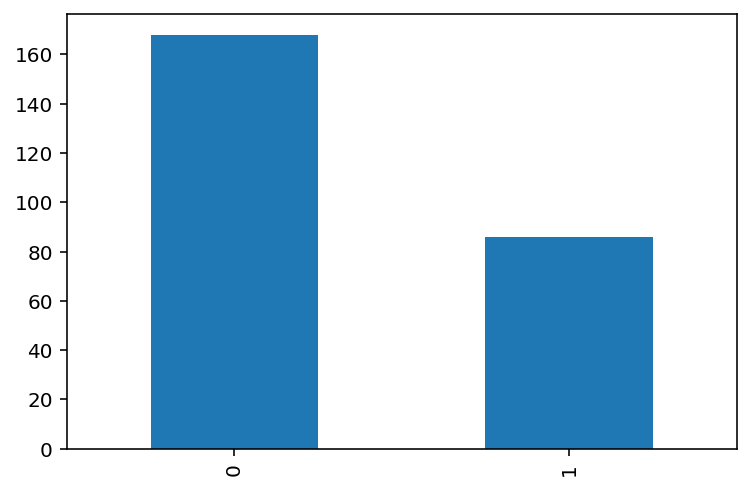

In [10]:
pd.Series(y_test).value_counts().plot.bar()

###### This can be called as Imbalanced dataset. One class is Predominant over the other class

###### Apply Algorithm without SMOTE

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lg=LogisticRegression()

In [13]:
lg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
pred=lg.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
print(accuracy_score(y_test,pred))

0.7480314960629921


In [17]:
print(confusion_matrix(y_test,pred))

[[136  32]
 [ 32  54]]


In [18]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test,pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0   1  All
True                   
0          136  32  168
1           32  54   86
All        168  86  254


In [19]:
print(32/86*100)

37.2093023255814


###### 37% of the TEST data is misclassified by Logistic Regression Algorithm. Can we apply any other algorith? Yey Sure.

###### Apply Random Forest Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
Rm=RandomForestClassifier(n_estimators=200,random_state=42)

In [40]:
Rm.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
rm_pred=Rm.predict(X_test)

In [42]:
print("Accuracy : {} ".format(accuracy_score(y_test,rm_pred)))

Accuracy : 0.7519685039370079 


In [43]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test,rm_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0   1  All
True                   
0          139  29  168
1           34  52   86
All        173  81  254


In [22]:
print(34/86*100)

39.53488372093023


###### So if you see in Random Forest Alg, we have the misclassification rate increased even more
Try doing the Hyperparameter Tuning

###### HyperParameter Tuning

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
param_grid={'n_estimators':range(20,200,20),'max_depth':range(1,20),'max_features':np.linspace(0.1,1,10),
           'min_samples_split' : range(2,10)}

In [144]:
grid=GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [145]:
#Make take while
grid.fit(X_train,y_train)

Fitting 3 folds for each of 13680 candidates, totalling 41040 fits
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=20, score=0.6569767441860465, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=20, score=0.6395348837209303, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=20, score=0.6823529411764706, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=40 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=40, score=0.6744186046511628, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=40 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=40, score=0.6569767441860465, to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=40, score=0.6705882352941176, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=60 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=60, score=0.6569767441860465, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=60 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=60, score=0.6453488372093024, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=60 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=60, score=0.6529411764705882, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=80 
[CV]  max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=80, score=0.6627906976744186, total=   0.0s
[CV] max_depth=1, max_features=0.1, min_samples_split=2, n_estimators=80 
[CV]  max_depth=1, max_features=0.1, min_samples_split=

[CV]  max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=160, score=0.7790697674418605, total=   0.1s
[CV] max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=160 
[CV]  max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=160, score=0.7732558139534884, total=   0.1s
[CV] max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=160 
[CV]  max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=160, score=0.7588235294117647, total=   0.1s
[CV] max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=180 
[CV]  max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=180, score=0.7965116279069767, total=   0.1s
[CV] max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=180 
[CV]  max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=180, score=0.7906976744186046, total=   0.1s
[CV] max_depth=19, max_features=0.6, min_samples_split=4, n_estimators=180 
[CV]  max_depth=19, max_features=0.

In [146]:
grid.best_params_

{'max_depth': 17,
 'max_features': 0.2,
 'min_samples_split': 7,
 'n_estimators': 80}

In [147]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
predrf=grid.predict(X_test)

In [151]:
print("The accuracy is {}".format(accuracy_score(y_test,predrf)))

The accuracy is 0.7440944881889764


In [155]:
print(pd.crosstab(y_test,predrf,rownames=['True'],colnames=['Predicted'],margins=True))
#print(pd.crosstab(y_test,rm_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Predicted    0   1  All
True                   
0          140  28  168
1           37  49   86
All        177  77  254


In [23]:
print(37/86*100)

43.02325581395349


###### Still 43%

###### Applying adaboost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
adf=AdaBoostClassifier(random_state=42)

In [27]:
adf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [28]:
ypred_adf=adf.predict(X_test)

In [29]:
print("Accuracy : {} ".format(accuracy_score(y_test,ypred_adf)))

Accuracy : 0.7559055118110236 


In [30]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test,ypred_adf, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0   1  All
True                   
0          138  30  168
1           32  54   86
All        170  84  254


In [31]:
print(32/86*100)

37.2093023255814


###### Adaboost Classifier with random forest as base estimator

In [32]:
from sklearn.ensemble import RandomForestClassifier
adrf=AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators=100)

In [33]:
adrf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [34]:
ypred_adrf=adf.predict(X_test)

In [35]:
print("Accuracy : {} ".format(accuracy_score(y_test,ypred_adrf)))

Accuracy : 0.7559055118110236 


In [36]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test,ypred_adrf, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0   1  All
True                   
0          138  30  168
1           32  54   86
All        170  84  254


In [36]:
print(32/86*100)

37.2093023255814


### Applying XGBoost Algorithm

In [37]:
import xgboost as xgb

In [38]:
xgb_cl=xgb.XGBClassifier(random_state=42)

In [39]:
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
ypred_xgb=xgb_cl.predict(X_test)

In [41]:
print("Accuracy : {} ".format(accuracy_score(y_test,ypred_xgb)))

Accuracy : 0.7401574803149606 


In [42]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test,ypred_xgb, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0   1  All
True                   
0          132  36  168
1           30  56   86
All        162  92  254


In [43]:
print(30/86*100)

34.883720930232556


###### Still 34%!!

###### Hyperparameter Tuning in XGBOOST

In [46]:
from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier

In [44]:
param_grid={'max_depth':range(2,20,5),
           'n_estimators':range(10,200,20)}

In [47]:
grid_dt=GridSearchCV(xgb_cl,param_grid,refit=True,scoring='precision',verbose=3)

In [48]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.944, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.600, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.786, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.600, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.720, total=   0.0s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ max_depth=2, n_estimators=30, score=0.806, total=   0.0s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=30, score=0.720, total=   0.0s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.806, total=   0.0s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.625, total=   0.0s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.742, total=   0.0s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.615, total=   0.0s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.727, total=   0.0s
[CV] max_depth=2, n_estimators=70 ....................................
[CV] ........ max_depth=2, n_estimators=70, score=0.774, total=   0.0s
[CV] max_depth=2, n_estimators=70 ....................................


[CV] ........ max_depth=2, n_estimators=70, score=0.618, total=   0.0s
[CV] max_depth=2, n_estimators=70 ....................................
[CV] ........ max_depth=2, n_estimators=70, score=0.719, total=   0.0s
[CV] max_depth=2, n_estimators=70 ....................................
[CV] ........ max_depth=2, n_estimators=70, score=0.586, total=   0.0s
[CV] max_depth=2, n_estimators=70 ....................................
[CV] ........ max_depth=2, n_estimators=70, score=0.686, total=   0.0s
[CV] max_depth=2, n_estimators=90 ....................................
[CV] ........ max_depth=2, n_estimators=90, score=0.767, total=   0.0s
[CV] max_depth=2, n_estimators=90 ....................................
[CV] ........ max_depth=2, n_estimators=90, score=0.618, total=   0.0s
[CV] max_depth=2, n_estimators=90 ....................................
[CV] ........ max_depth=2, n_estimators=90, score=0.758, total=   0.0s
[CV] max_depth=2, n_estimators=90 ....................................


[CV] ........ max_depth=2, n_estimators=90, score=0.586, total=   0.0s
[CV] max_depth=2, n_estimators=90 ....................................
[CV] ........ max_depth=2, n_estimators=90, score=0.697, total=   0.0s
[CV] max_depth=2, n_estimators=110 ...................................
[CV] ....... max_depth=2, n_estimators=110, score=0.786, total=   0.0s
[CV] max_depth=2, n_estimators=110 ...................................
[CV] ....... max_depth=2, n_estimators=110, score=0.606, total=   0.1s
[CV] max_depth=2, n_estimators=110 ...................................
[CV] ....... max_depth=2, n_estimators=110, score=0.743, total=   0.0s
[CV] max_depth=2, n_estimators=110 ...................................


[CV] ....... max_depth=2, n_estimators=110, score=0.600, total=   0.1s
[CV] max_depth=2, n_estimators=110 ...................................
[CV] ....... max_depth=2, n_estimators=110, score=0.719, total=   0.0s
[CV] max_depth=2, n_estimators=130 ...................................
[CV] ....... max_depth=2, n_estimators=130, score=0.821, total=   0.0s
[CV] max_depth=2, n_estimators=130 ...................................
[CV] ....... max_depth=2, n_estimators=130, score=0.583, total=   0.0s
[CV] max_depth=2, n_estimators=130 ...................................
[CV] ....... max_depth=2, n_estimators=130, score=0.727, total=   0.0s
[CV] max_depth=2, n_estimators=130 ...................................


[CV] ....... max_depth=2, n_estimators=130, score=0.600, total=   0.0s
[CV] max_depth=2, n_estimators=130 ...................................
[CV] ....... max_depth=2, n_estimators=130, score=0.719, total=   0.2s
[CV] max_depth=2, n_estimators=150 ...................................


[CV] ....... max_depth=2, n_estimators=150, score=0.821, total=   0.1s
[CV] max_depth=2, n_estimators=150 ...................................
[CV] ....... max_depth=2, n_estimators=150, score=0.595, total=   0.1s
[CV] max_depth=2, n_estimators=150 ...................................
[CV] ....... max_depth=2, n_estimators=150, score=0.706, total=   0.1s
[CV] max_depth=2, n_estimators=150 ...................................
[CV] ....... max_depth=2, n_estimators=150, score=0.581, total=   0.0s
[CV] max_depth=2, n_estimators=150 ...................................


[CV] ....... max_depth=2, n_estimators=150, score=0.710, total=   0.0s
[CV] max_depth=2, n_estimators=170 ...................................
[CV] ....... max_depth=2, n_estimators=170, score=0.828, total=   0.1s
[CV] max_depth=2, n_estimators=170 ...................................
[CV] ....... max_depth=2, n_estimators=170, score=0.605, total=   0.1s
[CV] max_depth=2, n_estimators=170 ...................................
[CV] ....... max_depth=2, n_estimators=170, score=0.722, total=   0.0s
[CV] max_depth=2, n_estimators=170 ...................................


[CV] ....... max_depth=2, n_estimators=170, score=0.594, total=   0.1s
[CV] max_depth=2, n_estimators=170 ...................................
[CV] ....... max_depth=2, n_estimators=170, score=0.688, total=   0.0s
[CV] max_depth=2, n_estimators=190 ...................................
[CV] ....... max_depth=2, n_estimators=190, score=0.800, total=   0.1s
[CV] max_depth=2, n_estimators=190 ...................................
[CV] ....... max_depth=2, n_estimators=190, score=0.605, total=   0.1s
[CV] max_depth=2, n_estimators=190 ...................................


[CV] ....... max_depth=2, n_estimators=190, score=0.714, total=   0.1s
[CV] max_depth=2, n_estimators=190 ...................................
[CV] ....... max_depth=2, n_estimators=190, score=0.606, total=   0.1s
[CV] max_depth=2, n_estimators=190 ...................................
[CV] ....... max_depth=2, n_estimators=190, score=0.688, total=   0.1s
[CV] max_depth=7, n_estimators=10 ....................................
[CV] ........ max_depth=7, n_estimators=10, score=0.743, total=   0.0s
[CV] max_depth=7, n_estimators=10 ....................................
[CV] ........ max_depth=7, n_estimators=10, score=0.697, total=   0.0s
[CV] max_depth=7, n_estimators=10 ....................................
[CV] ........ max_depth=7, n_estimators=10, score=0.758, total=   0.0s
[CV] max_depth=7, n_estimators=10 ....................................
[CV] ........ max_depth=7, n_estimators=10, score=0.562, total=   0.0s
[CV] max_depth=7, n_estimators=10 ....................................


[CV] ........ max_depth=7, n_estimators=10, score=0.568, total=   0.0s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.714, total=   0.0s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.575, total=   0.1s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.737, total=   0.0s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.606, total=   0.0s
[CV] max_depth=7, n_estimators=30 ....................................


[CV] ........ max_depth=7, n_estimators=30, score=0.697, total=   0.0s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ........ max_depth=7, n_estimators=50, score=0.735, total=   0.1s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ........ max_depth=7, n_estimators=50, score=0.564, total=   0.0s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ........ max_depth=7, n_estimators=50, score=0.714, total=   0.1s
[CV] max_depth=7, n_estimators=50 ....................................


[CV] ........ max_depth=7, n_estimators=50, score=0.606, total=   0.1s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ........ max_depth=7, n_estimators=50, score=0.645, total=   0.1s
[CV] max_depth=7, n_estimators=70 ....................................
[CV] ........ max_depth=7, n_estimators=70, score=0.735, total=   0.1s
[CV] max_depth=7, n_estimators=70 ....................................


[CV] ........ max_depth=7, n_estimators=70, score=0.579, total=   0.1s
[CV] max_depth=7, n_estimators=70 ....................................
[CV] ........ max_depth=7, n_estimators=70, score=0.676, total=   0.1s
[CV] max_depth=7, n_estimators=70 ....................................
[CV] ........ max_depth=7, n_estimators=70, score=0.618, total=   0.1s
[CV] max_depth=7, n_estimators=70 ....................................


[CV] ........ max_depth=7, n_estimators=70, score=0.688, total=   0.1s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.727, total=   0.1s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.595, total=   0.1s
[CV] max_depth=7, n_estimators=90 ....................................


[CV] ........ max_depth=7, n_estimators=90, score=0.657, total=   0.1s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.600, total=   0.1s
[CV] max_depth=7, n_estimators=90 ....................................
[CV] ........ max_depth=7, n_estimators=90, score=0.629, total=   0.1s
[CV] max_depth=7, n_estimators=110 ...................................


[CV] ....... max_depth=7, n_estimators=110, score=0.774, total=   0.1s
[CV] max_depth=7, n_estimators=110 ...................................
[CV] ....... max_depth=7, n_estimators=110, score=0.568, total=   0.1s
[CV] max_depth=7, n_estimators=110 ...................................
[CV] ....... max_depth=7, n_estimators=110, score=0.649, total=   0.1s


[CV] max_depth=7, n_estimators=110 ...................................
[CV] ....... max_depth=7, n_estimators=110, score=0.606, total=   0.1s
[CV] max_depth=7, n_estimators=110 ...................................
[CV] ....... max_depth=7, n_estimators=110, score=0.647, total=   0.1s
[CV] max_depth=7, n_estimators=130 ...................................


[CV] ....... max_depth=7, n_estimators=130, score=0.750, total=   0.1s
[CV] max_depth=7, n_estimators=130 ...................................
[CV] ....... max_depth=7, n_estimators=130, score=0.583, total=   0.1s
[CV] max_depth=7, n_estimators=130 ...................................


[CV] ....... max_depth=7, n_estimators=130, score=0.667, total=   0.1s
[CV] max_depth=7, n_estimators=130 ...................................
[CV] ....... max_depth=7, n_estimators=130, score=0.606, total=   0.1s
[CV] max_depth=7, n_estimators=130 ...................................


[CV] ....... max_depth=7, n_estimators=130, score=0.647, total=   0.1s
[CV] max_depth=7, n_estimators=150 ...................................
[CV] ....... max_depth=7, n_estimators=150, score=0.742, total=   0.1s
[CV] max_depth=7, n_estimators=150 ...................................


[CV] ....... max_depth=7, n_estimators=150, score=0.583, total=   0.2s
[CV] max_depth=7, n_estimators=150 ...................................
[CV] ....... max_depth=7, n_estimators=150, score=0.649, total=   0.1s
[CV] max_depth=7, n_estimators=150 ...................................


[CV] ....... max_depth=7, n_estimators=150, score=0.606, total=   0.2s
[CV] max_depth=7, n_estimators=150 ...................................
[CV] ....... max_depth=7, n_estimators=150, score=0.636, total=   0.1s
[CV] max_depth=7, n_estimators=170 ...................................


[CV] ....... max_depth=7, n_estimators=170, score=0.750, total=   0.2s
[CV] max_depth=7, n_estimators=170 ...................................
[CV] ....... max_depth=7, n_estimators=170, score=0.571, total=   0.1s
[CV] max_depth=7, n_estimators=170 ...................................


[CV] ....... max_depth=7, n_estimators=170, score=0.639, total=   0.2s
[CV] max_depth=7, n_estimators=170 ...................................
[CV] ....... max_depth=7, n_estimators=170, score=0.606, total=   0.1s
[CV] max_depth=7, n_estimators=170 ...................................


[CV] ....... max_depth=7, n_estimators=170, score=0.636, total=   0.2s
[CV] max_depth=7, n_estimators=190 ...................................
[CV] ....... max_depth=7, n_estimators=190, score=0.774, total=   0.2s
[CV] max_depth=7, n_estimators=190 ...................................


[CV] ....... max_depth=7, n_estimators=190, score=0.583, total=   0.2s
[CV] max_depth=7, n_estimators=190 ...................................
[CV] ....... max_depth=7, n_estimators=190, score=0.639, total=   0.1s
[CV] max_depth=7, n_estimators=190 ...................................


[CV] ....... max_depth=7, n_estimators=190, score=0.606, total=   0.2s
[CV] max_depth=7, n_estimators=190 ...................................
[CV] ....... max_depth=7, n_estimators=190, score=0.647, total=   0.2s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] ....... max_depth=12, n_estimators=10, score=0.703, total=   0.0s
[CV] max_depth=12, n_estimators=10 ...................................


[CV] ....... max_depth=12, n_estimators=10, score=0.618, total=   0.0s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] ....... max_depth=12, n_estimators=10, score=0.781, total=   0.0s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] ....... max_depth=12, n_estimators=10, score=0.581, total=   0.0s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] ....... max_depth=12, n_estimators=10, score=0.615, total=   0.0s
[CV] max_depth=12, n_estimators=30 ...................................
[CV] ....... max_depth=12, n_estimators=30, score=0.714, total=   0.0s
[CV] max_depth=12, n_estimators=30 ...................................
[CV] ....... max_depth=12, n_estimators=30, score=0.639, total=   0.0s
[CV] max_depth=12, n_estimators=30 ...................................


[CV] ....... max_depth=12, n_estimators=30, score=0.722, total=   0.1s
[CV] max_depth=12, n_estimators=30 ...................................
[CV] ....... max_depth=12, n_estimators=30, score=0.576, total=   0.0s
[CV] max_depth=12, n_estimators=30 ...................................
[CV] ....... max_depth=12, n_estimators=30, score=0.676, total=   0.1s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] ....... max_depth=12, n_estimators=50, score=0.714, total=   0.1s
[CV] max_depth=12, n_estimators=50 ...................................


[CV] ....... max_depth=12, n_estimators=50, score=0.605, total=   0.1s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] ....... max_depth=12, n_estimators=50, score=0.750, total=   0.1s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] ....... max_depth=12, n_estimators=50, score=0.600, total=   0.1s
[CV] max_depth=12, n_estimators=50 ...................................


[CV] ....... max_depth=12, n_estimators=50, score=0.710, total=   0.1s
[CV] max_depth=12, n_estimators=70 ...................................
[CV] ....... max_depth=12, n_estimators=70, score=0.743, total=   0.1s
[CV] max_depth=12, n_estimators=70 ...................................
[CV] ....... max_depth=12, n_estimators=70, score=0.537, total=   0.1s
[CV] max_depth=12, n_estimators=70 ...................................


[CV] ....... max_depth=12, n_estimators=70, score=0.700, total=   0.1s
[CV] max_depth=12, n_estimators=70 ...................................
[CV] ....... max_depth=12, n_estimators=70, score=0.600, total=   0.1s
[CV] max_depth=12, n_estimators=70 ...................................
[CV] ....... max_depth=12, n_estimators=70, score=0.677, total=   0.1s
[CV] max_depth=12, n_estimators=90 ...................................


[CV] ....... max_depth=12, n_estimators=90, score=0.743, total=   0.2s
[CV] max_depth=12, n_estimators=90 ...................................
[CV] ....... max_depth=12, n_estimators=90, score=0.564, total=   0.1s
[CV] max_depth=12, n_estimators=90 ...................................
[CV] ....... max_depth=12, n_estimators=90, score=0.667, total=   0.1s
[CV] max_depth=12, n_estimators=90 ...................................


[CV] ....... max_depth=12, n_estimators=90, score=0.588, total=   0.1s
[CV] max_depth=12, n_estimators=90 ...................................
[CV] ....... max_depth=12, n_estimators=90, score=0.677, total=   0.1s
[CV] max_depth=12, n_estimators=110 ..................................


[CV] ...... max_depth=12, n_estimators=110, score=0.765, total=   0.1s
[CV] max_depth=12, n_estimators=110 ..................................
[CV] ...... max_depth=12, n_estimators=110, score=0.564, total=   0.1s
[CV] max_depth=12, n_estimators=110 ..................................


[CV] ...... max_depth=12, n_estimators=110, score=0.677, total=   0.1s
[CV] max_depth=12, n_estimators=110 ..................................
[CV] ...... max_depth=12, n_estimators=110, score=0.583, total=   0.1s
[CV] max_depth=12, n_estimators=110 ..................................


In [49]:
grid_dt.best_params_

{'max_depth': 2, 'n_estimators': 10}

In [50]:
grid_dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
ypred_xgbHyp=classifier.predict(X_test)

In [55]:
print("Accuracy : {} ".format(accuracy_score(y_test,ypred_xgbHyp)))

Accuracy : 0.7519685039370079 


In [56]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test,ypred_xgbHyp, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0   1  All
True                   
0          145  23  168
1           40  46   86
All        185  69  254


In [57]:
print(40/86*100)

46.51162790697674


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [59]:
score

array([0.75324675, 0.74025974, 0.80519481, 0.66233766, 0.68831169,
       0.79220779, 0.79220779, 0.80519481, 0.72368421, 0.80263158])

In [60]:
score.mean()

0.7565276828434724

###### Using SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
sm=SMOTE(random_state=42)

In [22]:
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


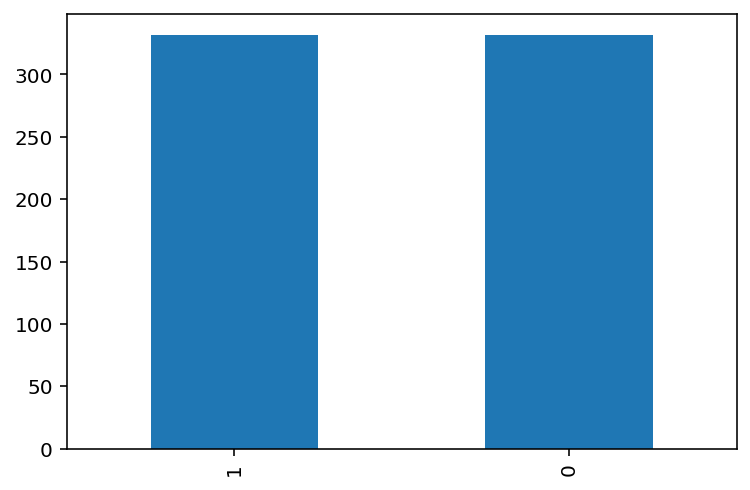

In [23]:
pd.Series(y_train_sm).value_counts().plot.bar()

###### Logistic REgression with SMOTE

In [24]:
#fit the model
lg_sm=LogisticRegression()

In [25]:
lg_sm.fit(X_train_sm,y_train_sm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
train_pred_sm=lg_sm.predict(X_train_sm)

In [27]:
test_pred_sm=lg_sm.predict(X_test)

In [45]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train_sm,train_pred_sm))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,test_pred_sm))

Accuracy score for Training Dataset =  0.7620481927710844
Accuracy score for Testing Dataset =  0.7086614173228346


In [47]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       168
           1       0.56      0.69      0.61        86

    accuracy                           0.71       254
   macro avg       0.69      0.70      0.69       254
weighted avg       0.73      0.71      0.71       254



In [55]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test,test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0    1  All
True                    
0          121   47  168
1           27   59   86
All        148  106  254


In [0]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_sm, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

In [57]:
print('The Misclassified Percentage for daibetes as non diabetes is : {0:.2f} %'.format(27/86*100))

The Misclassified Percentage for daibetes as non diabetes is : 31.40 %


###### Random Forest with SMOTE

In [59]:
rd_sm=RandomForestClassifier(n_estimators=200,random_state=42)

In [60]:
rd_sm.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [61]:
test_pred_sm_rd=rd_sm.predict(X_test)

In [62]:
train_pred_sm_rd=rd_sm.predict(X_train_sm)

In [64]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train_sm,train_pred_sm_rd))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test,test_pred_sm_rd))

Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.7480314960629921


In [65]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_sm, train_pred_sm_rd, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0    1  All
True                    
0          332    0  332
1            0  332  332
All        332  332  664


In [66]:
print('Confusion Matrix - Test Dataset')
print(pd.crosstab(y_test, test_pred_sm_rd, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Test Dataset
Predicted    0    1  All
True                    
0          127   41  168
1           23   63   86
All        150  104  254


In [69]:
print(classification_report(y_test,test_pred_sm_rd))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       168
           1       0.61      0.73      0.66        86

    accuracy                           0.75       254
   macro avg       0.73      0.74      0.73       254
weighted avg       0.77      0.75      0.75       254



In [67]:
print('The Misclassified Percentage in Test Set for daibetes as non diabetes is : {0:.2f} %'.format(25/86*100))

The Misclassified Percentage in Test Set for daibetes as non diabetes is : 29.07 %


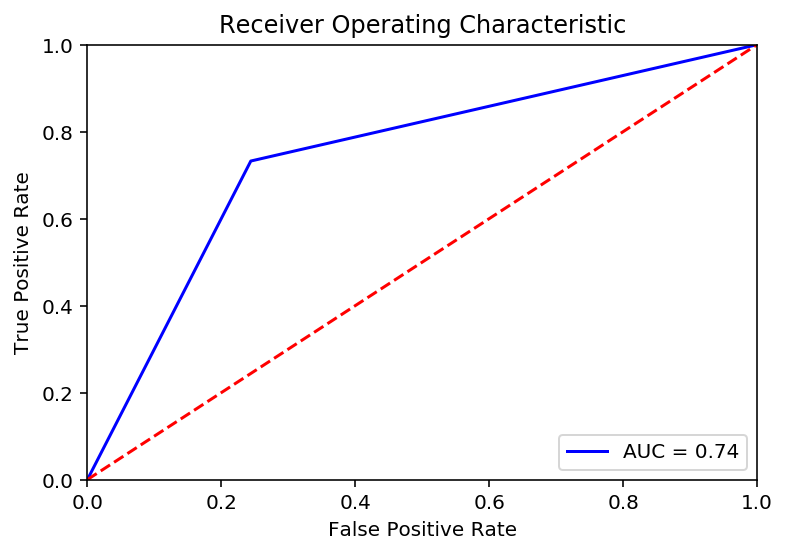

In [68]:
from sklearn.metrics import auc,roc_curve
fpr, tpr, threshold = roc_curve(y_test, test_pred_sm_rd)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion:
        By Working on this dataset, we have emerged the below underlying information:
            1. The dataset is not highly Imbalanced. But its Imbalanced quite. So SMOTE is not Mandatory.
            2. By applying all the Classification alg, the  metrics and the Prediction rate accuarcy have not changed.
            3. After applying SMOTE, it's clearly evident the overall Classification rate has been improved. So the Random Forest with SMOTE is good to go with this dataset.